# Project Outline: Customer Personality Analysis

## 1. Project Setup
### Objective
The primary goal of this project is to perform customer segmentation using unsupervised learning techniques. By analyzing the provided features, we aim to identify distinct customer segments based on their demographics, purchasing behavior, and interactions with promotional campaigns. These insights will help the business tailor its marketing strategies, improve customer retention, and optimize product offerings.

### Data Source
Confirm the dataset to be used, such as the “Customer Personality Analysis” dataset from Kaggle.

## 2. Data Exploration and Preprocessing
### Load Data
Load the dataset into a DataFrame.

### Initial Exploration
- Use methods like `info()`, `describe()`, and `head()` to understand the structure and summary statistics of the data.
- Identify the types of variables (numerical, categorical, dates).

### Missing Values Analysis
- Identify missing values using a custom function or built-in methods.
- Decide on strategies to handle missing values (e.g., imputation, removal).

### Data Cleaning
- Handle missing values appropriately.
- Convert data types if necessary (e.g., date columns).
- Remove duplicates if any.

### Feature Engineering
- Create new features if needed (e.g., total children in household by summing `Kidhome` and `Teenhome`).
- Normalize or standardize numerical features to ensure they are on a similar scale.

## 3. Exploratory Data Analysis (EDA)
### Univariate Analysis
- Analyze individual features using histograms, box plots, and summary statistics.
  - **Example**: Distribution of `Income`, `Year_Birth`, `MntWines`, etc.

### Bivariate Analysis
- Explore relationships between pairs of features using scatter plots, correlation matrices, and bar plots.
  - **Example**: Relationship between `Income` and `MntWines`, `NumWebPurchases` and `NumWebVisitsMonth`.

### Multivariate Analysis
- Use pair plots, heatmaps, and other techniques to understand interactions between multiple features.
  - **Example**: Heatmap of correlations between `Income`, `MntWines`, `MntFruits`, etc.

### Visualization
- Create visualizations to summarize the findings from EDA.

## 4. Clustering Analysis
### Feature Selection
- Select relevant features for clustering based on EDA insights.

### Dimensionality Reduction (optional)
- Use techniques like PCA to reduce the number of features while retaining most of the variance.

### Clustering Techniques
#### K-Means Clustering
- Determine the optimal number of clusters using methods like the elbow method and silhouette score.
- Fit the K-Means model and analyze the clusters.

#### Hierarchical Clustering
- Perform hierarchical clustering and visualize the dendrogram.
- Determine the optimal number of clusters and analyze the results.

#### DBSCAN
- Apply DBSCAN and analyze the clusters formed.

### Model Comparison
- Compare the results of different clustering techniques.
- Select the best model based on evaluation metrics and interpretability.

## 5. Model Evaluation
### Silhouette Score
- Evaluate the quality of the clusters using the silhouette score.

### Cluster Analysis
- Analyze the characteristics of each cluster (e.g., average income, spending patterns).
- Identify key differences and similarities between clusters.

### Visualization
- Use plots to visualize the clusters and their characteristics.
- Create cluster profiles to summarize the key attributes of each cluster.

## 6. Insights and Reporting
### Key Findings
- Summarize the main findings from the clustering analysis.
- Highlight the characteristics of each customer segment.

### Business Implications
- Discuss how the insights can be used to improve business strategies (e.g., targeted marketing, personalized offers).

### Next Steps
- Suggest further analysis or additional data that could enhance the model.
- Propose potential actions based on the findings (e.g., marketing campaigns, product recommendations).

## 7. Report Preparation
### Structure
- **Introduction**: Briefly introduce the project and its objectives.
- **Data Description**: Describe the dataset and its attributes.
- **Methodology**: Explain the steps taken for data preprocessing, feature engineering, and clustering.
- **Results**: Present the clustering results and key findings.
- **Conclusion**: Summarize the insights and their business implications.
- **Appendix** (optional): Include any additional information, such as code snippets or detailed analysis.

## 8. Submission
### PDF Report
- Compile the report into a PDF format.

### Code Notebook
- Optionally, include a Jupyter notebook with the code used for the analysis.


In [93]:
import os
import warnings
import logging
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import display, HTML

warnings.simplefilter(action="ignore")


### PART 0. Load Data & Initial Exploration

In [22]:
# Load the file
input_file_path = "marketing_campaign.csv"
current_df = pd.read_csv(input_file_path, sep="\t")

# Display the first few rows of the dataframe
display(current_df.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [28]:
current_df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [52]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2209 non-null   int64         
 1   Year_Birth           2209 non-null   int64         
 2   Education            2209 non-null   object        
 3   Marital_Status       2209 non-null   object        
 4   Income               2209 non-null   float64       
 5   Kidhome              2209 non-null   int64         
 6   Teenhome             2209 non-null   int64         
 7   Dt_Customer          2209 non-null   datetime64[ns]
 8   Recency              2209 non-null   int64         
 9   MntWines             2209 non-null   int64         
 10  MntFruits            2209 non-null   int64         
 11  MntMeatProducts      2209 non-null   int64         
 12  MntFishProducts      2209 non-null   int64         
 13  MntSweetProducts     2209 non-null   i

In [63]:
# Check unique values in categorical columns
categorical_columns = current_df.select_dtypes(include=['object']).columns
unique_values = {col: current_df[col].nunique() for col in categorical_columns}
display(unique_values)

# Provide the list of values and the top 10 count for each categorical column
for col in categorical_columns:
    value_counts = current_df[col].value_counts().head(10)
    print(f"Top 10 values for column '{col}':")
    print(value_counts)
    print("\n")


{'Education': 5, 'Marital_Status': 5}

Top 10 values for column 'Education':
Education
Graduation    1114
Phd            478
Master         363
2nd cycle      200
Basic           54
Name: count, dtype: int64


Top 10 values for column 'Marital_Status':
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Name: count, dtype: int64




### PART 0.1 Missing Values Analysis

In [62]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    total_count = len(df)
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'}
    )
    
    mis_val_table_ren_columns['Total Count'] = total_count
    return mis_val_table_ren_columns

display(missing_values_table(current_df))

,Missing Values,% of Total Values,Total Count
ID,0,0.0,2209
Year_Birth,0,0.0,2209
Education,0,0.0,2209
Marital_Status,0,0.0,2209
Income,0,0.0,2209
Kidhome,0,0.0,2209
Teenhome,0,0.0,2209
Dt_Customer,0,0.0,2209
Recency,0,0.0,2209
MntWines,0,0.0,2209


In [41]:
# Check for duplicate rows
duplicate_rows = current_df[current_df.duplicated()]

# Display the duplicate rows
display(duplicate_rows)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


### PART 0.2 Data Cleaning

In [36]:
# Drop rows where 'Income' column has missing values
current_df = current_df.dropna(subset=['Income'])

# re-check for missing values - no missing values present
#display(missing_values_table(current_df))

In [38]:
# Change '2n Cycle' to '2nd Cycle' in the 'Education' column
current_df['Education'] = current_df['Education'].replace('2n Cycle', '2nd Cycle')

# Drop rows where 'Marital_Status' is 'Alone', 'Absurd', or 'YOLO'
current_df = current_df[~current_df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO'])]

# Change 'Dt_Customer' column to datetime data type
current_df['Dt_Customer'] = pd.to_datetime(current_df['Dt_Customer'], format='%d-%m-%Y')

In [50]:
# Standardize categorical values (if needed)
current_df['Education'] = current_df['Education'].str.capitalize()
current_df['Marital_Status'] = current_df['Marital_Status'].str.capitalize()

In [47]:
display(current_df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Phd,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,Phd,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


### PART 0.3 Feature Engineering

In [53]:
# Age: Calculate the age of the customer from the Year_Birth.
current_df['Age'] = 2024 - current_df['Year_Birth']


In [54]:
# Total Children: Sum of Kidhome and Teenhome to get the total number of children in the household.
current_df['Total_Children'] = current_df['Kidhome'] + current_df['Teenhome']


In [55]:
# Customer Tenure: Calculate the number of days since the customer enrolled with the company.
current_df['Customer_Tenure'] = (pd.to_datetime('today') - current_df['Dt_Customer']).dt.days


In [56]:
# Total Spending: Sum of all spending columns (MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds) to get the total amount spent by the customer.
current_df['Total_Spending'] = current_df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [57]:
# Average Spending per Purchase: Calculate the average spending per purchase by dividing Total_Spending by the total number of purchases.
current_df['Total_Purchases'] = current_df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
current_df['Avg_Spending_per_Purchase'] = current_df['Total_Spending'] / current_df['Total_Purchases']


In [58]:
# Total Campaigns Accepted: Sum of all campaign acceptance columns (AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5) to get the total number of campaigns accepted by the customer.
current_df['Total_Campaigns_Accepted'] = current_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)


In [60]:
# Is_Parent: 1 if the customer has at least one child or teenager, 0 otherwise
current_df['Is_Parent'] = ((current_df['Kidhome'] > 0) | (current_df['Teenhome'] > 0)).astype(int)

In [61]:
# Family_Size: Sum of Kidhome, Teenhome, and 1 (for the customer), and add 1 if Marital_Status is Married or Together
current_df['Family_Size'] = current_df['Kidhome'] + current_df['Teenhome'] + 1 + current_df['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)


In [106]:
# Drop the specified columns
current_df = current_df.drop(columns=['Z_CostContact', 'Z_Revenue', 'Response'])

# Reorder the columns
ordered_columns = [
    'ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Age', 
    'Total_Children', 'Kidhome', 'Teenhome', 'Is_Parent', 'Family_Size', 
    'Dt_Customer', 'Recency', 'Customer_Tenure', 'MntWines', 'MntFruits', 
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 
    'Total_Spending', 'Total_Purchases', 'Avg_Spending_per_Purchase', 
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp1', 
    'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
    'Total_Campaigns_Accepted', 'Complain'
]

current_df = current_df[ordered_columns]

In [107]:
current_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 0 to 2239
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         2209 non-null   int64         
 1   Year_Birth                 2209 non-null   int64         
 2   Education                  2209 non-null   object        
 3   Marital_Status             2209 non-null   object        
 4   Income                     2209 non-null   float64       
 5   Age                        2209 non-null   int64         
 6   Total_Children             2209 non-null   int64         
 7   Kidhome                    2209 non-null   int64         
 8   Teenhome                   2209 non-null   int64         
 9   Is_Parent                  2209 non-null   int64         
 10  Family_Size                2209 non-null   int64         
 11  Dt_Customer                2209 non-null   datetime64[ns]
 12  Recency    

## PART 1. Exploratory Data Analysis (EDA)
### PART 1.1 Univariate Analysis
- Analyze individual features using histograms, box plots, and summary statistics.

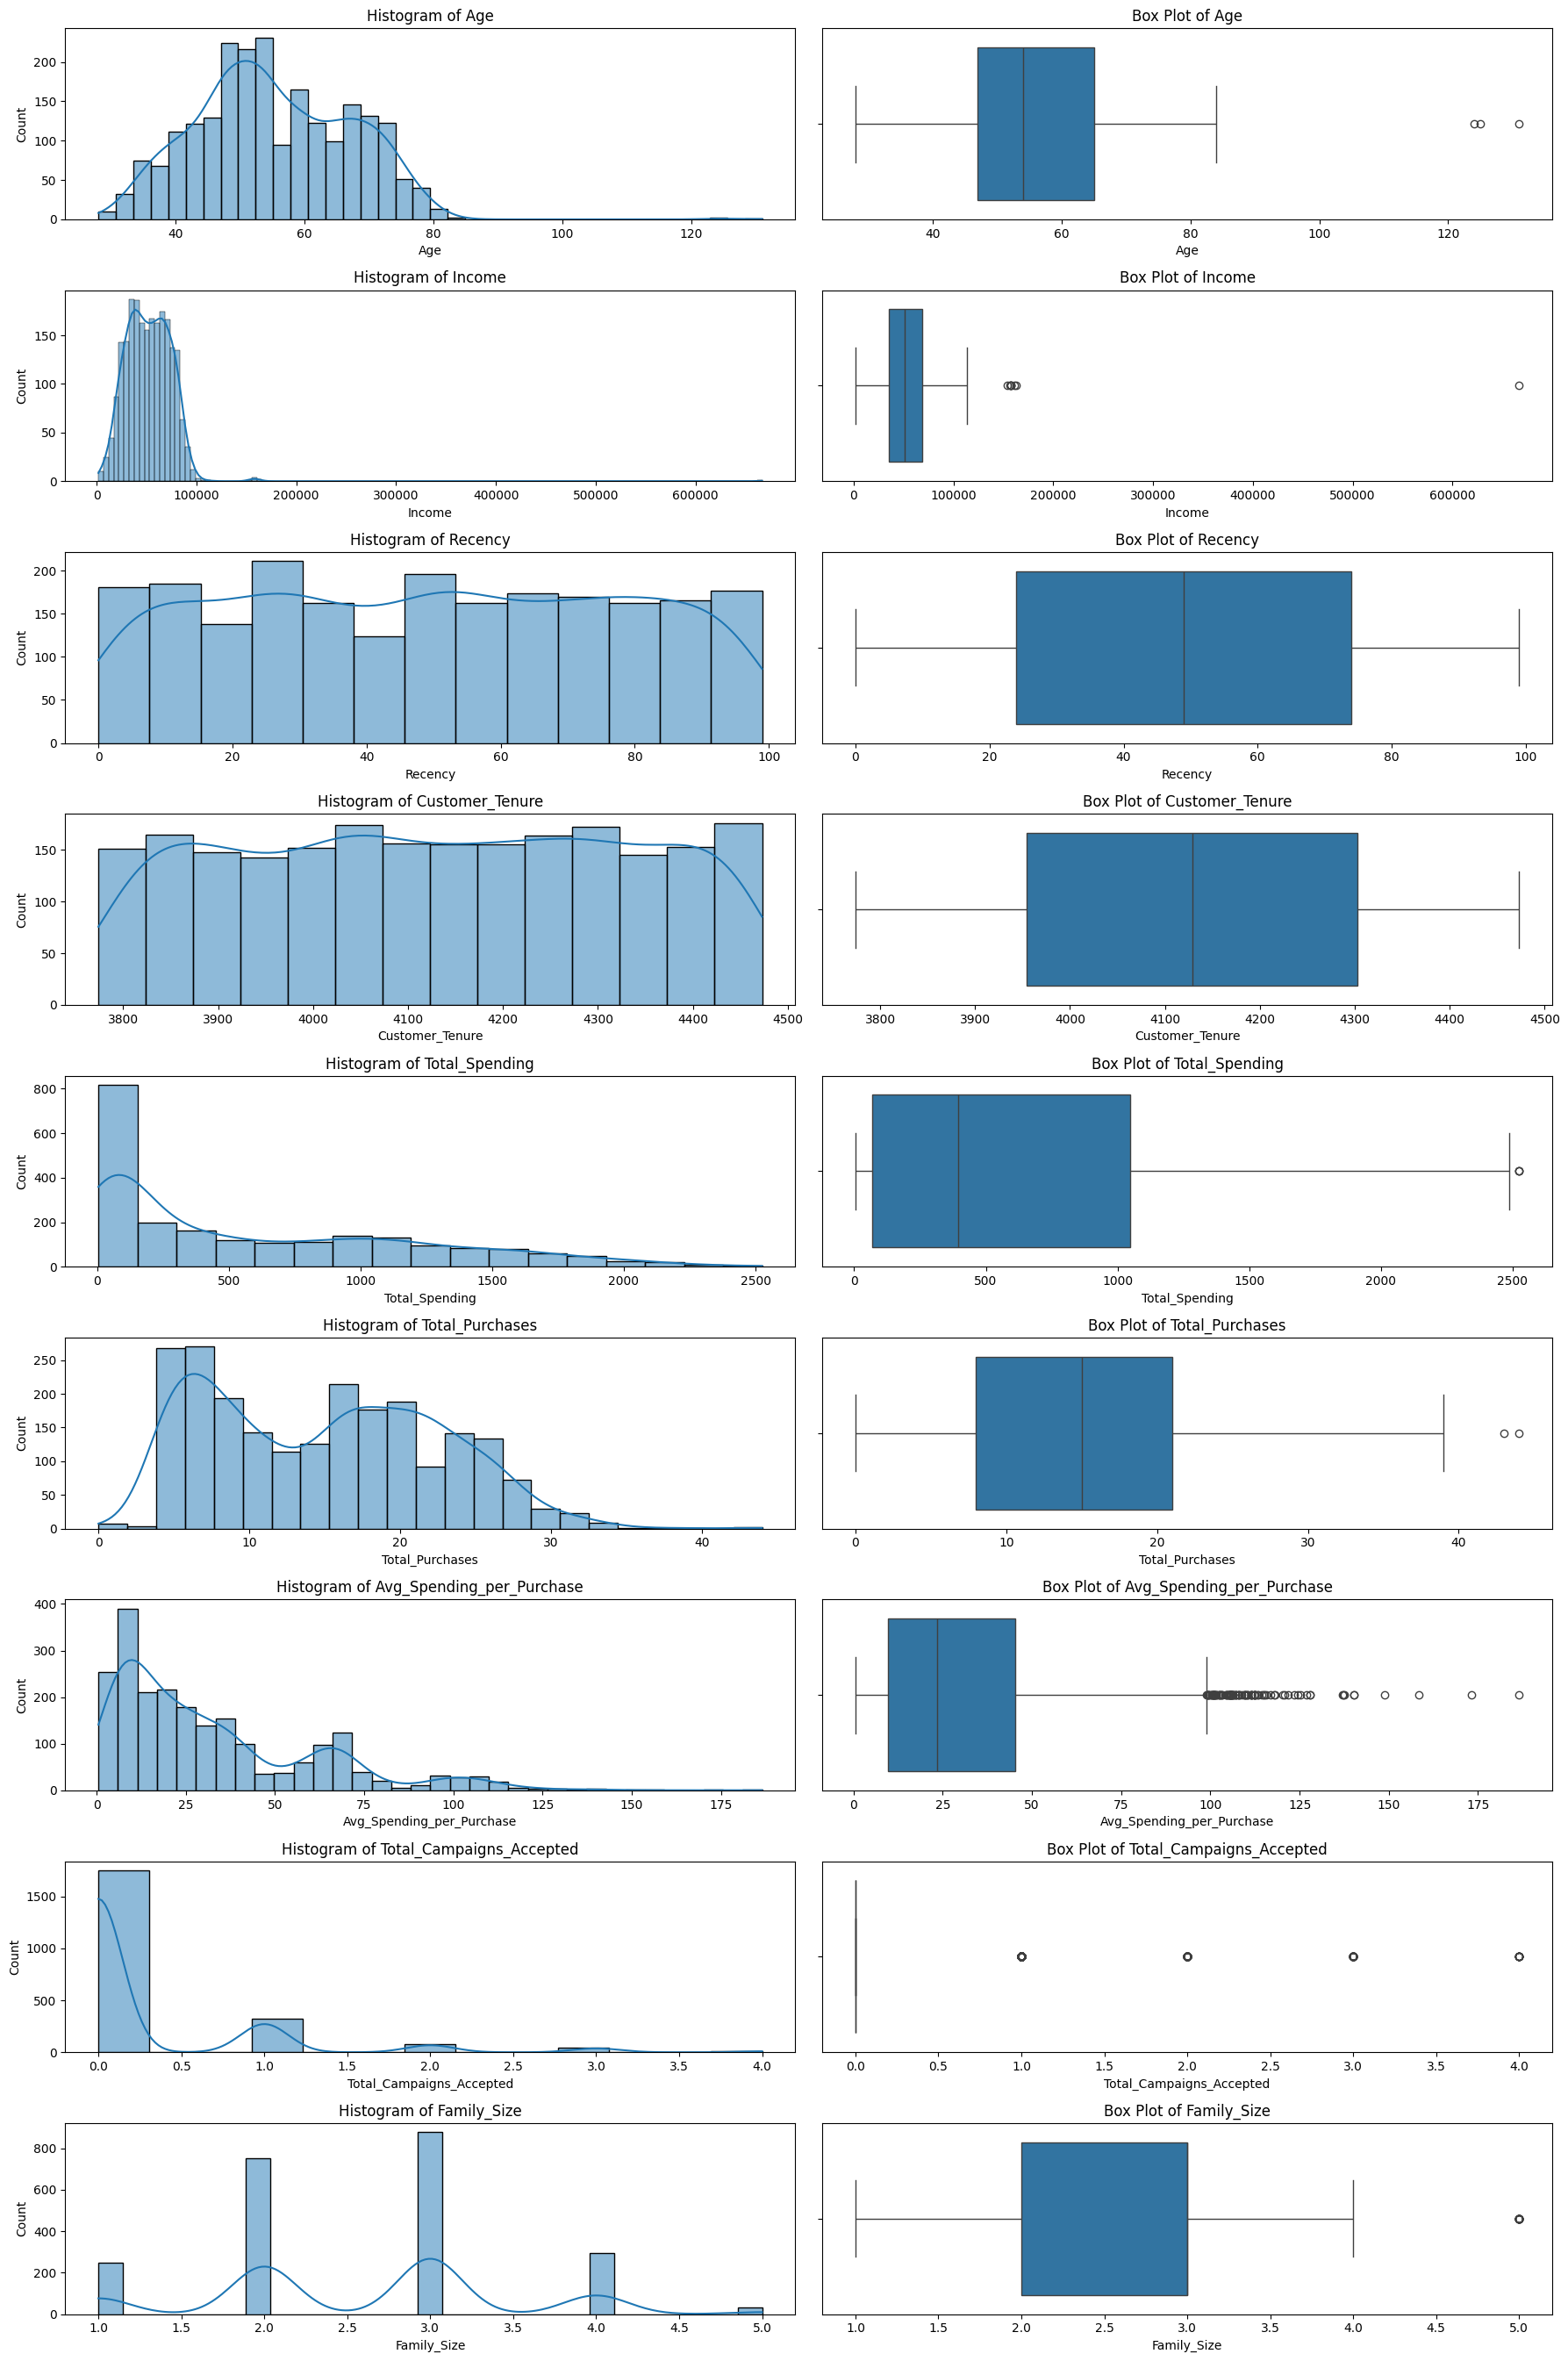

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features for univariate analysis
numerical_features = ['Age', 'Income', 'Recency', 'Customer_Tenure', 
                      'Total_Spending', 'Total_Purchases', 
                      'Avg_Spending_per_Purchase', 'Total_Campaigns_Accepted',
                      'Family_Size']

# Number of features
num_features = len(numerical_features)

# Create a figure with subplots
fig, axes = plt.subplots(num_features, 2, figsize=(18, 3 * num_features))

# Iterate over each numerical feature and plot histogram and box plot
for i, feature in enumerate(numerical_features):
    # Histogram
    sns.histplot(current_df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    # Box plot
    sns.boxplot(x=current_df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()


In [105]:
stop

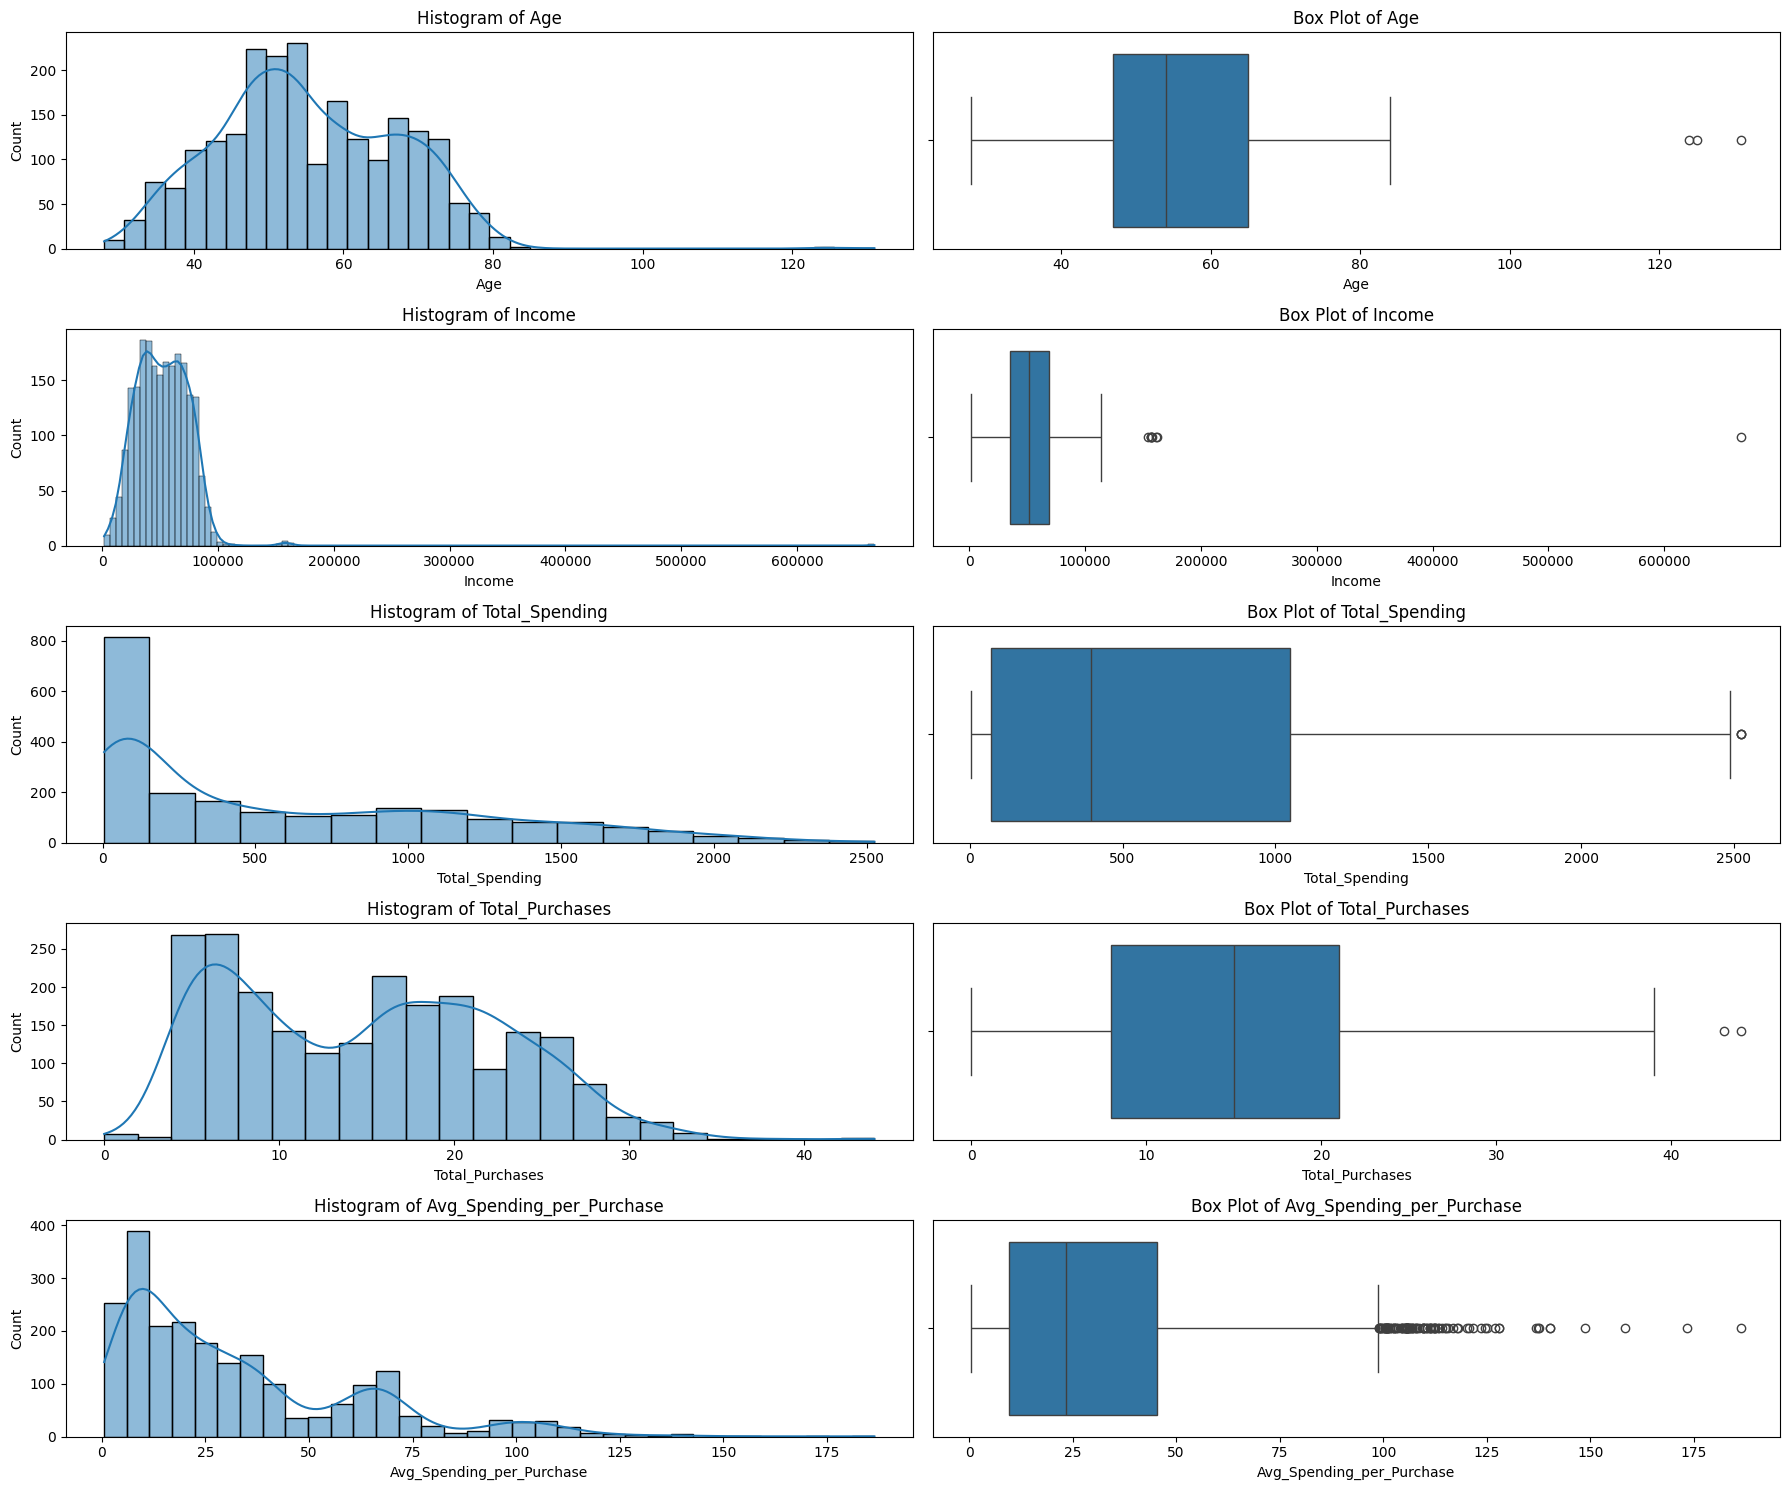

In [111]:
# List of numerical features for univariate analysis
numerical_features = ['Age', 'Income', 'Total_Spending', 'Total_Purchases', 'Avg_Spending_per_Purchase']

# Plot histograms and box plots for numerical features
fig, axes = plt.subplots(len(numerical_features), 2, figsize=(18, 3 * len(numerical_features)))
for i, feature in enumerate(numerical_features):
    sns.histplot(current_df[feature], kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {feature}')
    
    sns.boxplot(x=current_df[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


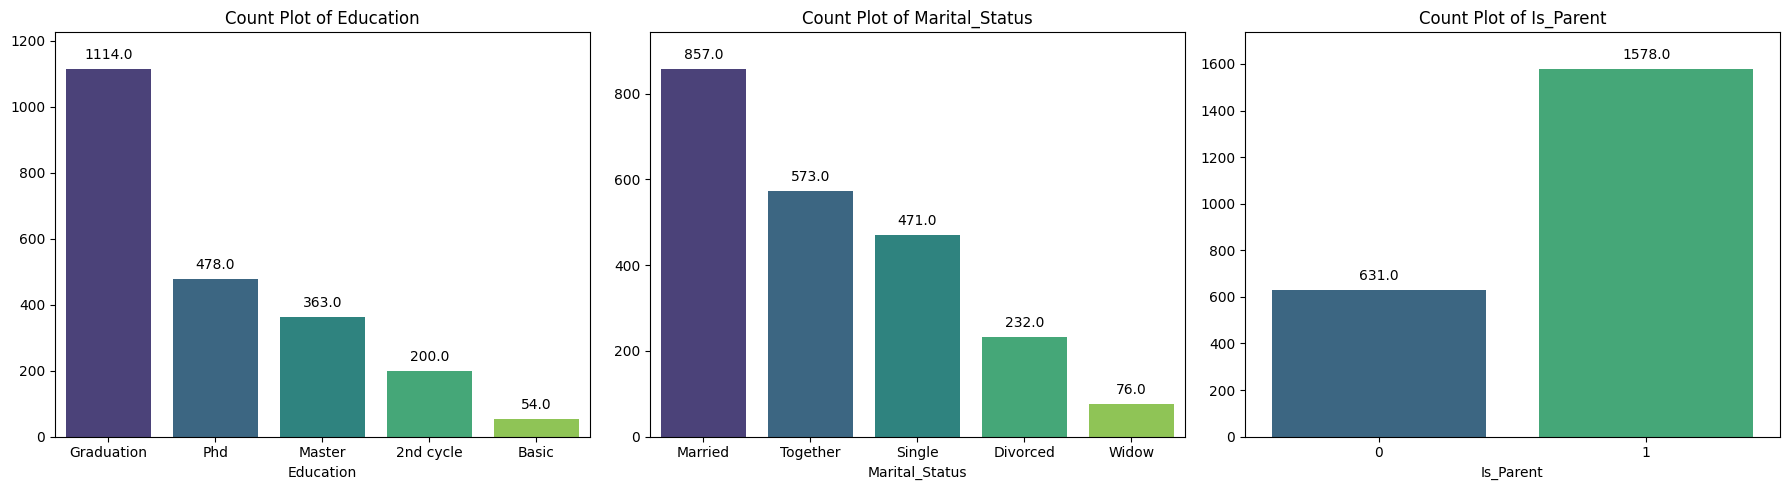

In [112]:
# List of categorical features for univariate analysis
categorical_features = ['Education', 'Marital_Status', 'Is_Parent']

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Iterate over each categorical feature and plot count plot
for i, feature in enumerate(categorical_features):
    # Sort the values in descending order
    sorted_counts = current_df[feature].value_counts().sort_values(ascending=False)
    sns.barplot(ax=axes[i], x=sorted_counts.index, y=sorted_counts.values, palette='viridis')
    axes[i].set_title(f'Count Plot of {feature}')
    
    # Increase y-axis limit by 10%
    axes[i].set_ylim(0, sorted_counts.max() * 1.1)
    
    # Add labels on top of the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Display the plots
plt.tight_layout()
plt.show()

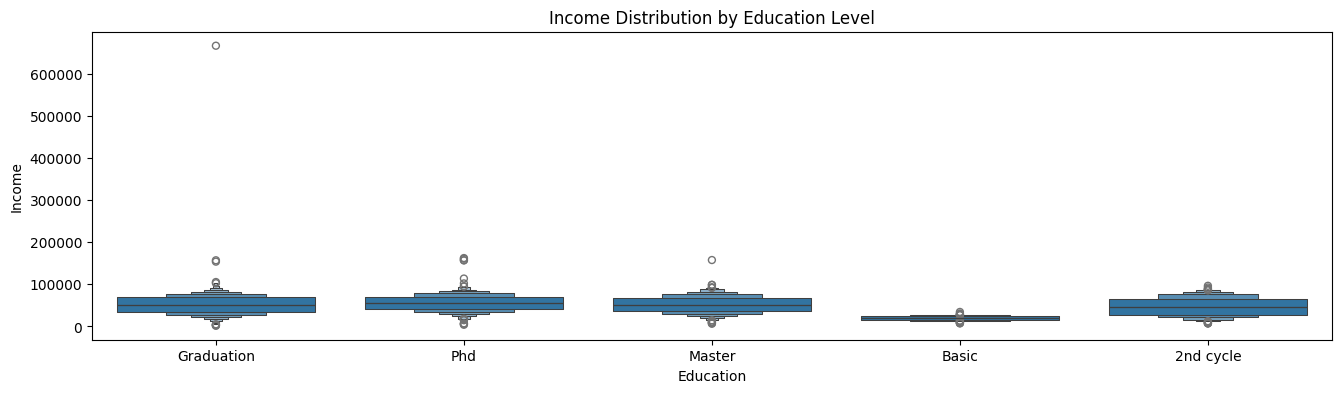

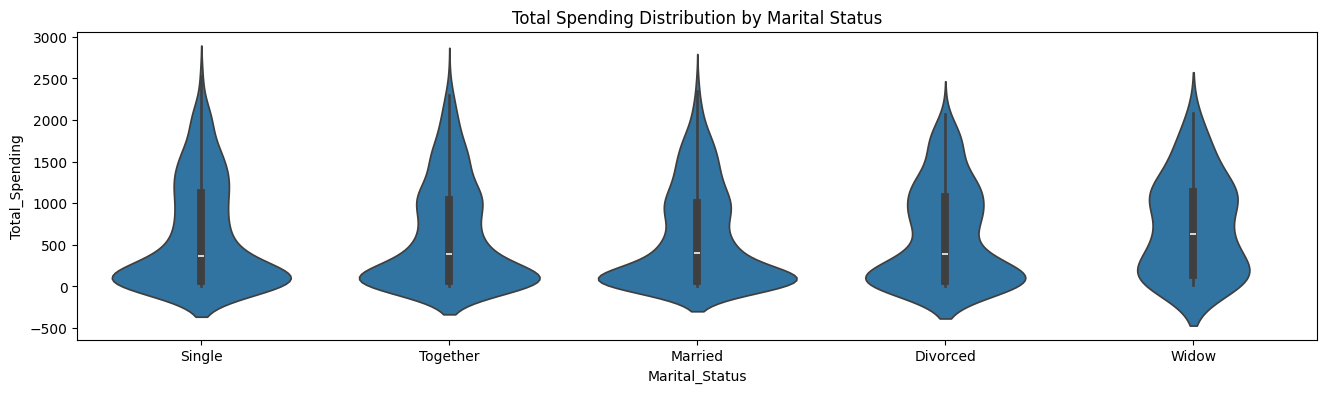

In [116]:
# Boxen plot for detailed distribution analysis
plt.figure(figsize=(16, 4))
sns.boxenplot(x='Education', y='Income', data=current_df)
plt.title('Income Distribution by Education Level')
plt.show()

# Violin plot for distribution and density
plt.figure(figsize=(16, 4))
sns.violinplot(x='Marital_Status', y='Total_Spending', data=current_df)
plt.title('Total Spending Distribution by Marital Status')
plt.show()
